In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBooster:

    def __init__(self, max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.1, num_iter=1000):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0
        '''This method initializes the gradient boosting algorithm with hyperparameters such as maximum depth of trees (max_depth),
        minimum samples required to split an internal node (min_samples_split), minimum samples required to be at a leaf node (min_samples_leaf),
        maximum number of features to consider for split (max_features), learning rate (lr), and number of boosting iterations (num_iter).
        It also initializes the mean of target values (y_mean).'''

    def __calculate_loss(self,y, y_pred):
        loss = (1/len(y)) * 0.5 * np.sum(np.square(y-y_pred))
        return loss
        #This method computes the mean squared error loss between true target values and predicted target values.

    def __take_gradient(self, y, y_pred):
        grad = -(y-y_pred)
        return grad
        #This method calculates the negative gradient of the loss function with respect to the predicted values.

    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(criterion='squared_error', max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                min_samples_leaf=self.min_samples_leaf,
                                max_features=self.max_features)
        base.fit(X,y)
        return base
        #This method creates a base regression model, which is a decision tree regressor, using the specified hyperparameters.

    def predict(self,models,y,X):
        pred_0 = np.array([self.y_mean] * len(X))
        pred = pred_0.reshape(len(pred_0),1)

        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X),1)
            pred -= self.lr * temp

        return pred
        #This method predicts target values by summing up predictions from each base model and updating the predictions based on the learning rate.

    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y))
        pred = pred_0.reshape(len(pred_0),1)

        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            base = self.__create_base_model(X, grads)
            r = (base.predict(X)).reshape(len(X),1)
            pred -= self.lr * r
            models.append(base)

        return models, losses, pred_0
        '''This method trains the gradient boosting algorithm. It initializes predictions with the mean of target values, computes loss,
         calculates gradients, fits a base model to the gradients, updates predictions based on the learning rate, and repeats this process for
          the specified number of boosting iterations. It returns the trained models, losses at each iteration, and initial predictions.'''

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/maindataset/Processed_data1.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)
#TRAIN
G = GradientBooster()
models, losses, pred_0 = G.train(X_train,y_train)

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'Loss vs Epoch')]

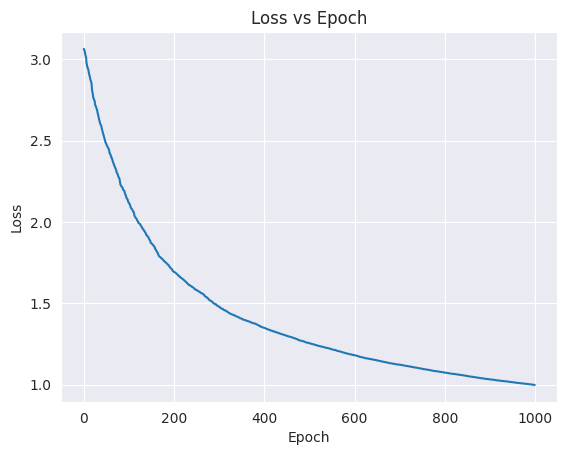

In [ ]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(1000),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')

In [ ]:
from sklearn.metrics import mean_squared_error, cohen_kappa_score

y_pred = G.predict(models, y_train, X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

# Calculate Quadratic Weighted Kappa (QWK)
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

qwk = quadratic_weighted_kappa(y_test, np.round(y_pred))
print('QWK:', qwk)


RMSE: 1.6187862171666831
QWK: 0.7048055897133456


model 2

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBooster:

    def __init__(self, max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.1, num_iter=1000):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0
        '''This method initializes the gradient boosting algorithm with hyperparameters such as maximum depth of trees (max_depth),
        minimum samples required to split an internal node (min_samples_split), minimum samples required to be at a leaf node (min_samples_leaf),
        maximum number of features to consider for split (max_features), learning rate (lr), and number of boosting iterations (num_iter).
        It also initializes the mean of target values (y_mean).'''

    def __calculate_loss(self,y, y_pred):
        loss = (1/len(y)) * 0.5 * np.sum(np.square(y-y_pred))
        return loss
        #This method computes the mean squared error loss between true target values and predicted target values.

    def __take_gradient(self, y, y_pred):
        grad = -(y-y_pred)
        return grad
        #This method calculates the negative gradient of the loss function with respect to the predicted values.

    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(criterion='squared_error', max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                min_samples_leaf=self.min_samples_leaf,
                                max_features=self.max_features)
        base.fit(X,y)
        return base
        #This method creates a base regression model, which is a decision tree regressor, using the specified hyperparameters.

    def predict(self,models,y,X):
        pred_0 = np.array([self.y_mean] * len(X))
        pred = pred_0.reshape(len(pred_0),1)

        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X),1)
            pred -= self.lr * temp

        return pred
        #This method predicts target values by summing up predictions from each base model and updating the predictions based on the learning rate.

    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y))
        pred = pred_0.reshape(len(pred_0),1)

        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            base = self.__create_base_model(X, grads)
            r = (base.predict(X)).reshape(len(X),1)
            pred -= self.lr * r
            models.append(base)

        return models, losses, pred_0
        '''This method trains the gradient boosting algorithm. It initializes predictions with the mean of target values, computes loss,
         calculates gradients, fits a base model to the gradients, updates predictions based on the learning rate, and repeats this process for
          the specified number of boosting iterations. It returns the trained models, losses at each iteration, and initial predictions.'''

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/maindataset/Processed_data1.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)
#TRAIN
G = GradientBooster()
models, losses, pred_0 = G.train(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, cohen_kappa_score

# Generate predictions using the model and test data
y_pred = G.predict(models, y_train, X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# Calculate Quadratic Weighted Kappa (QWK)
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

qwk = quadratic_weighted_kappa(y_test, np.round(y_pred))
print('QWK:', qwk)


MSE: 2.635588152745999
MAE: 1.2610186988500363
RMSE: 1.6234494611000365
R2 Score: 0.5587778495660762
QWK: 0.7046731798700849


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'Loss vs Epoch')]

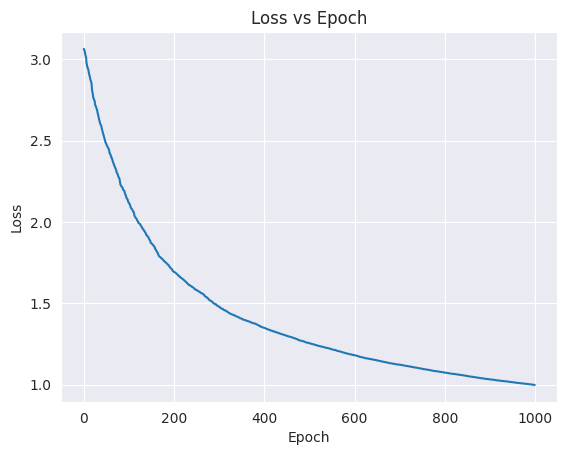

In [ ]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(1000),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')